In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tskit
import msprime
import demes
import demesdraw
import stdpopsim

from matplotlib import font_manager

font_dirs = ["/home/hblee/.conda/envs/tskit_dev/fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.fontset"] = 'cm'

In [2]:
demog = stdpopsim.get_species('HomSap').get_demographic_model("AmericanAdmixture_4B18")
seq_length = 1e8
demography = msprime.Demography.from_demes(demog.model.to_demes())
ts = msprime.sim_ancestry(
    samples={"AFR": 500, "EUR": 500, "ASIA": 500, "ADMIX": 500},
    sequence_length=seq_length,
    recombination_rate=1e-8,
    demography=demography,
    ploidy=2,
    random_seed=2)
population_label = [ts.node(i.nodes[0]).population for i in ts.individuals()]
ts.dump('admixed.ts')

In [3]:
ts = tskit.load('admixed.ts')
ts

In [4]:
relatedness_individuals = ts.genetic_relatedness(
    sample_sets = ts.samples().reshape(-1,1),
    indexes = [i.nodes for i in ts.individuals()],
    mode='branch',
    centre=False,
    proportion=False
)
np.save('relatedness_individuals.npy', relatedness_individuals)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


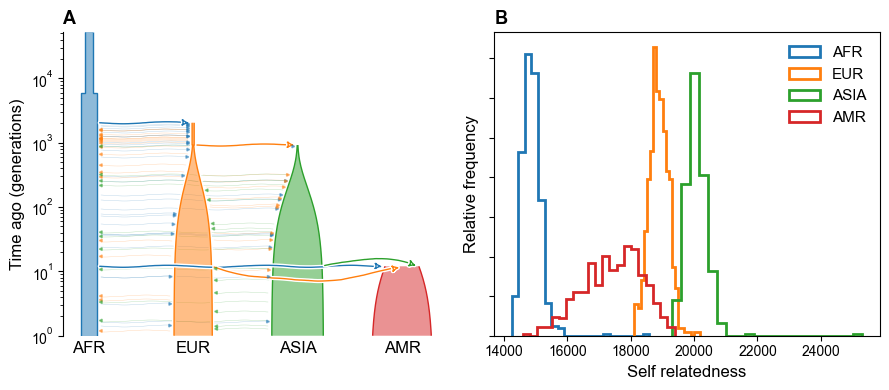

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

labels = ['AFR', 'EUR', 'ASIA', 'AMR']

# demographic model
demesdraw.tubes(demog.model.to_demes(), log_time=True, ax=ax[0])
ax[0].set_xticklabels(labels, fontsize=12)
ax[0].set_ylabel('Time ago (generations)', fontsize=12)

# histogram
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i, label in enumerate(np.unique(population_label)):
    idx_plot = np.array(population_label) == label
    ax[1].hist(relatedness_individuals[idx_plot], bins=21, label=labels[i],
           facecolor='none', edgecolor=colors[i], density=True, histtype=u'step', linewidth=2)
ax[1].legend(frameon=False, fontsize=11)
ax[1].set_xlabel('Self relatedness', fontsize=12)
ax[1].set_yticklabels([])
ax[1].set_ylabel('Relative frequency', fontsize=12)

ax[0].set_title('A', loc='left', fontweight='bold', fontsize=13)
ax[1].set_title('B', loc='left', fontweight='bold', fontsize=13)

plt.tight_layout()
plt.savefig('geneticvariance.eps', bbox_inches='tight')
plt.show()